In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# randomly generate data
N = 500  # number of training sample
d = 2  # data dimension
C = 3  # number of classes (for c = 0, 1, 2)
means = [[2, 2], [8, 3], [3, 6]]  # centeroid of each class dataset
cov = [[1, 0], [0, 1]]
# generate 3 classes of datasets
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# each column is a datapoint (arrange 3 vectors X1 X2 X3 then transpose matrix)
X = np.concatenate((X0, X1, X2), axis=0).T
# extended data by add row ONES (equivalent to 1) at first place
X = np.concatenate((np.ones((1, 3 * N)), X), axis=0)

# Generate label for data points of each class (0, 1, 2)
# with first 500 will belong to class 0, second 500 => 1 and last 500=> class 2
original_label = np.asarray([0] * N + [1] * N + [2] * N).T


def display(X, label):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    plt.plot(X0[0, :], X0[1, :], 'b^', markersize=4, alpha=.8)
    plt.plot(X1[0, :], X1[1, :], 'go', markersize=4, alpha=.8)
    plt.plot(X2[0, :], X2[1, :], 'rs', markersize=4, alpha=.8)
    plt.axis('off')
    plt.plot()
    plt.show()


# display(X[1:, :], original_label)


def convert_labels(y, C=C):
    """
    convert 1d label to a matrix label: each column of this
    matrix coresponding to 1 element in y. In i-th column of Y,
    only one non-zeros element located in the y[i]-th position,
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

    [[1, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape=(C, len(y))).toarray()
    return Y


# Y = convert_labels(y, C)
def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.
    """
    e_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    A = e_Z / e_Z.sum(axis=0)
    return A


def softmax(Z):
    """
    #Compute softmax values for each sets of scores in V.
    #each column of V is a set of score.
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis=0)
    return A


def softmax_regression(X, y, W_init, eta, tol=1e-4, max_count=10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]

    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta * xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count % check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W


# cost or loss function
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y * np.log(A))


# Predict that X belong to which class (1..C now indexed as 0..C-1 )
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """

    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis=0)


# W[-1] is the solution, W is all history of weights
eta = .05
d = X.shape[0]
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W[-1])

log = LogisticRegression(penalty='l2')
log.fit(X.T, original_label.T)
print(log.coef_)
# #Visualize
# xm = np.arange(-2, 11, 0.025)
# xlen = len(xm)
# ym = np.arange(-3, 10, 0.025)
# ylen = len(ym)
# xx, yy = np.meshgrid(xm, ym)
# print(np.ones((1, xx.size)).shape)
# xx1 = xx.ravel().reshape(1, xx.size)
# yy1 = yy.ravel().reshape(1, yy.size)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis=0)
# print(XX.shape)
# Z = pred(W[-1], XX)
# Z = Z.reshape(xx.shape)

[[ 8.03408914 -4.1433407  -3.85084646]
 [-0.3561899   2.13068314 -0.47795268]
 [-0.31872764 -0.33122573  2.50116259]]
[[-1.44203942e-04 -1.74480970e+00 -1.56630018e+00]
 [ 7.11142114e-06  2.64443462e+00 -5.92307272e-01]
 [ 1.37092521e-04 -8.99624916e-01  2.15860745e+00]]


<class 'numpy.ndarray'>


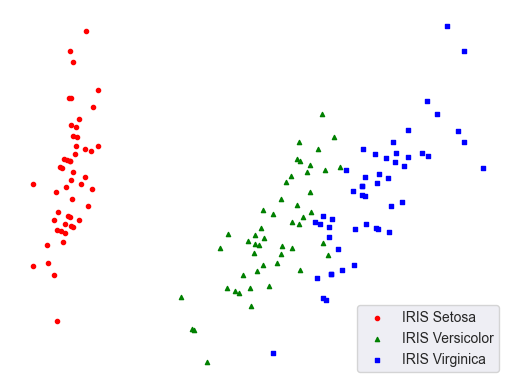

In [3]:
#Bài 2
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :4]  # we take full 4 features
Y = iris.target
# Normalize data
X_norm = (X - X.min()) / (X.max() - X.min())
pca = sklearnPCA(n_components=2)  #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
print(type(Y))
plt.axis("off")
plt.scatter(transformed[Y == 0][0], transformed[Y == 0][1], s=9, label='IRIS Setosa', c='red')
plt.scatter(transformed[Y == 1][0], transformed[Y == 1][1], s=9, label='IRIS Versicolor', c='green', marker="^")
plt.scatter(transformed[Y == 2][0], transformed[Y == 2][1], s=9, label='IRIS Virginica', c='blue', marker="s")
plt.legend()
plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris = load_iris()
# print(iris)
X = iris.data  # Observed variable
Y = iris.target  # Dependent variable (label)

#print(X.shape)
#print(Y.shape)
# Splitting Train and test Data
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2,
                                                                            random_state=2)

#sc=StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.transform(X_test)
# Call to Logistic Regression Model - SAG: solving is based on Stochastic Average Gradient
lorg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=5000)
# and train model by Training Dataset
lorg.fit(X_train, Y_train)
# Then Predict the Test data
Y_pred = lorg.predict(X_test)
# for accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test, Y_pred))
# for confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

0.9666666666666667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


In [5]:
#bài 3
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.model_selection import train_test_split

n_samples = 20000
X, y = fetch_20newsgroups_vectorized(subset='all', return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.1)

train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.823342175066313


c:\users\cosyt\pycharmprojects\mlbasic\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# change file_data to where did you put it!
file_data = 'ex4Data/glass.csv'
glass_df = pd.read_csv(file_data)
# print(glass_df.info())
glass_types = glass_df['Type'].unique()
# print(glass_types)
# print(glass_df['Type'].value_counts())
X_1 = glass_df[glass_df.columns[:-1]]
y_1 = glass_df['Type']
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.25, random_state=42)
classifier = LogisticRegression(max_iter=90, multi_class='multinomial', solver='lbfgs')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[13  1  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
0.9814814814814815


c:\users\cosyt\pycharmprojects\mlbasic\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
import os
import numpy as np

# set names to the paths because they're too long
data_path = 'ex4Data/'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')


def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip  # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path, 'r')
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size, )
    # Read labels
    f_labels = gzip.open(labels_path, 'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels


train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(5000, 784) (5000,)
(10000, 784) (10000,)


1 3


<Figure size 640x480 with 0 Axes>

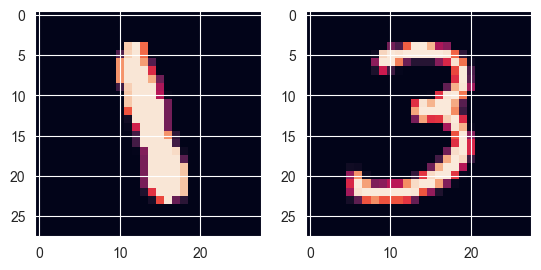

(785, 5000)
(10, 5000)


<Figure size 640x480 with 0 Axes>

epoch 0 - cost 0.7994720650682904
epoch 1 - cost 0.7941996142525146
epoch 2 - cost 0.7877357476460212
epoch 3 - cost 0.7850251350590722
epoch 4 - cost 0.7796716861913922
epoch 5 - cost 0.7830502226690386
epoch 6 - cost 0.7823097514855852
epoch 7 - cost 0.7847924185808539
epoch 8 - cost 0.7802715346320312
epoch 9 - cost 0.7791671215261446
epoch 10 - cost 0.780088994806152
epoch 11 - cost 0.7787861883122785
epoch 12 - cost 0.7792196896872827
epoch 13 - cost 0.7777442237927246
epoch 14 - cost 0.7792008137182594
epoch 15 - cost 0.7802540142457342
epoch 16 - cost 0.7783272899823969
epoch 17 - cost 0.7772435204472377
epoch 18 - cost 0.7790139055695429
epoch 19 - cost 0.777148419257708
training success:  (785, 10) 500
accuracy training data:  0.9096
(785, 10000)
accuracy testing data:  0.8457


In [8]:
# Convert matrix to image
def get_image(image):
    return image.reshape(28, 28)


# These methods are from Vi du 1
def convert_labels(y, C):
    from scipy import sparse

    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape=(C, len(y))).toarray()
    return Y


def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis=0)
    return A


def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    A = e_Z / e_Z.sum(axis=0)
    return A


def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis=0)


def _softmax_regression(X, Y, theta, lambda_=0.5, iterations=20, learning_rate=1e-5, batch_size=200):
    from sklearn.metrics import log_loss
    losses = []
    _theta = theta
    d, N = X.shape
    for iter_ in range(iterations):
        shuffle_index = np.random.permutation(N)

        for i in shuffle_index:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(10, 1)
            ai = softmax_stable(np.dot(_theta.T, xi))
            _theta += learning_rate * xi.dot((yi - ai).T)
            if (iter_ * N + i) % batch_size == 0:
                Y_hat = np.dot(_theta.T, X)
                losses.append(log_loss(Y, Y_hat))
        Y_hat = np.dot(_theta.T, X)
        print(f"epoch {iter_} - cost {log_loss(Y, Y_hat) / N}")
    return _theta, losses


# for display and test digit :D
import random
import matplotlib.pyplot as plt

index = random.randint(0, 1000)
print(train_labels[index], test_labels[index])
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()
X_train = np.concatenate((np.ones((1, train_images.shape[0])), train_images.T), axis=0)

Y_train = convert_labels(train_labels, 10)
print(X_train.shape)
print(Y_train.shape)
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()
#subplot(r,c) provide the no. of rows and columns f, axarr = plt.subplot s(1, 2)
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()
theta = np.zeros((X_train.shape[0], 10))
opt_theta, losses = _softmax_regression(X_train, Y_train, theta)
print('training success: ', opt_theta.shape, len(losses))
from sklearn.metrics import accuracy_score

print('accuracy training data: ', accuracy_score(train_labels, pred(opt_theta, X_train)))

# test_images, test_labels = get_mnist_data(
# test_images_path, test_labels_path, 1000, _is=False, shuffle=False)
X_test = np.concatenate((np.ones((1, test_images.shape[0])), test_images.T), axis=0)

print(X_test.shape)
print('accuracy testing data: ', accuracy_score(test_labels, pred(opt_theta, X_test)))

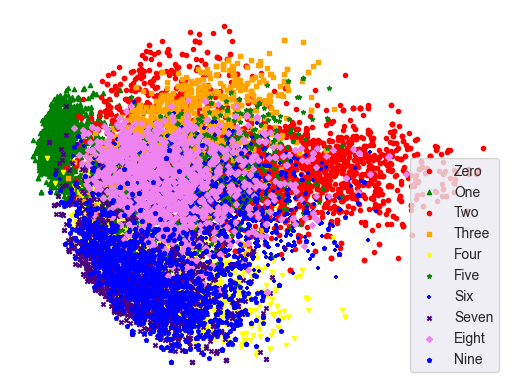

Accuracy Score:  0.869
[[ 940    0    6   12    2   21   12    2    4    3]
 [   0 1119    6    3    0    4    3    6   15    0]
 [   7    9  858   51    8    6   16    5   46    5]
 [  11    3    7  875    8   51    7   21   37   17]
 [   8    0   15    5  836    2   16    3   17   61]
 [   9    5   23   43    6  671   27   12   72    8]
 [   5    0   22    2   10   27  912    1    2    0]
 [   0   11   13   15   14    5    1  904   15   40]
 [  20    9   29   73   16   59   15   12  745    9]
 [   7    3    7   11   50   12    0   35   14  830]]


c:\users\cosyt\pycharmprojects\mlbasic\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Normalize data
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA as sklearnPCA

X = np.concatenate((X_train, X_test), axis=1).T
Y = np.concatenate((train_labels, test_labels))
X_norm = (X - X.min()) / (X.max() - X.min())
pca = sklearnPCA(n_components=2)  #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

plt.axis("off")
plt.scatter(transformed[Y == 0][0], transformed[Y == 0][1], s=9, label='Zero', c='red')
plt.scatter(transformed[Y == 1][0], transformed[Y == 1][1], s=9, label='One', c='green',
            marker="^")
plt.scatter(transformed[Y == 2][0], transformed[Y == 2][1], s=9, label='Two', c='#FF0000',
            marker="o")
plt.scatter(transformed[Y == 3][0], transformed[Y == 3][1], s=9, label='Three', c='#FFA500',
            marker="s")
plt.scatter(transformed[Y == 4][0], transformed[Y == 4][1], s=9, label='Four', c='#FFFF00',
            marker="v")
plt.scatter(transformed[Y == 5][0], transformed[Y == 5][1], s=9, label='Five', c='#078000',
            marker="*")
plt.scatter(transformed[Y == 6][0], transformed[Y == 6][1], s=9, label='Six', c='#0000FF',
            marker="+")
plt.scatter(transformed[Y == 7][0], transformed[Y == 7][1], s=9, label='Seven', c='#4B0082',
            marker="x")
plt.scatter(transformed[Y == 8][0], transformed[Y == 8][1], s=9, label='Eight', c='#EE82EE',
            marker="D")
plt.scatter(transformed[Y == 9][0], transformed[Y == 9][1], s=9, label='Nine', c='blue',
            marker="p")
plt.legend()
plt.show()
from sklearn import linear_model

log = linear_model.LogisticRegression(multi_class='multinomial')
X = X_train.T
log.fit(X, train_labels)
Y_pr = log.predict(X_test.T)
print("Accuracy Score: ", accuracy_score(test_labels, Y_pr))
print(confusion_matrix(test_labels, Y_pr))